In [1]:
import jax.numpy as np
from jax import jit
from discopy import Tensor
Tensor.np = np

import discopy

In [2]:
#******************************************
# Generate your corpus
#******************************************
# sentences can be of the `word1 word2 word3 ...`
# if you are generating the diagrams using templates
# then you may want to consider adding POS tags (N, V, Adj) for each word
# labels should be of the form [0,1] or [1,0] for binary classification
from discopy import Diagram, Id, Cup, Ty, Word

s, n = Ty('s'), Ty('n')
#tv = n.r @ s @ n.l

Alice, Bob, Eve = Word('Alice', n), Word('Bob', n), Word('Eve', n)
loves, hates, kills =  Word('loves', n.r @ s @ n.l),  Word('hates', n.r @ s @ n.l) , Word('kills', n.r @ s @ n.l)

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

parsing = {"{} {} {}".format(subj, verb, obj): subj @ verb @ obj >> grammar
            for subj in [Alice, Bob, Eve] for verb in [loves, hates, kills] for obj in [Alice, Bob, Eve]}

#type(parsing)
#parsing
#parsing.values()

sentences=[]
for i in parsing:
    #print (i)
    sentences.append(i)
    
#print(sentences)

In [4]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences = train_test_split(sentences, test_size=0.5, random_state=42)
test_sentences, dev_sentences= train_test_split(test_sentences, test_size=0.5, random_state=42)


print("Training set:\n{}\n".format('\n'.join(train_sentences)))
print("Testing set:\n{}".format('\n'.join(map(str, test_sentences))))
print("Dev set:\n{}".format('\n'.join(map(str, dev_sentences))))

Training set:
Bob kills Alice
Eve hates Bob
Alice hates Alice
Eve kills Bob
Eve hates Eve
Eve loves Alice
Eve kills Eve
Eve loves Eve
Alice kills Bob
Bob loves Bob
Bob hates Eve
Eve loves Bob
Alice kills Alice

Testing set:
Bob hates Bob
Alice loves Eve
Alice loves Alice
Bob kills Eve
Alice loves Bob
Eve hates Alice
Bob kills Bob
Dev set:
Eve kills Alice
Alice hates Bob
Alice kills Eve
Alice hates Eve
Bob loves Eve
Bob hates Alice
Bob loves Alice


In [5]:

# TODO make sentences
#train_sentences = []
#'Alice loves Bob', 'Alice hates Eve', 'Bob kills Eve'
#dev_sentences = []
#test_sentences = []

# TODO make labels
train_labels = [1, 1, 1, 1, 1, 1,0,0,0,0,0,0,0]
dev_labels = [1,1,1,0,0,0,0]
test_labels = [0,0,0,1,1,1,1]

train_labels = np.array(train_labels)
dev_labels = np.array(dev_labels)
test_labels = np.array(test_labels)


In [6]:
from discopy import Ty, Word, Cup, Id

s, n = Ty('s'), Ty('n')
tv = n.r @ s @ n.l

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

def sentence2diagram(s):
    for subj, verb, obj in [s.split(' ')]:
        diagram = Word(subj, n) @ Word(verb, tv) @ Word(obj, n) >> grammar
        #diagram = {s: Word(subj, n) @ Word(verb, tv) @ Word(obj, n) >> grammar}
    return diagram
    #diagrams[sentence].draw()
    #print("Pregroup diagram for '{}'".format(sentence))
    #print(sentence)
    #print(subj)

In [7]:
#******************************************
# Generate your diagrams
#******************************************
# TODO generate the DisCoCat diagrams for your corpus. There are 2 options:
# 1. Follow a few fixed templates (N V N, N V Adj N, ...)
# 2. Use the online tool to generate diagrams. 
# If you are using the online tool, consider writing a script.

# Suggestion: print out some of your DisCoCat diagrams using
# `grammar.draw` to check that they make sense.

# TODO implement sentence2diagram
#sentence2diagram = None

train_diagrams = [sentence2diagram(s) for s in train_sentences]
dev_diagrams = [sentence2diagram(s) for s in dev_sentences]
test_diagrams = [sentence2diagram(s) for s in test_sentences]

from discopy import Word, Ty, Cup, Id, grammar
from sympy.abc import phi

n, s = Ty('n'), Ty('s')

# example of how to make your template:
# then you use your pos tags to determine which template to use
#def NVN_example(w0, w1, w2):
#    words = Word(w0, n) @ Word(w1, n.r @ s @ n.l) @ Word(w2, n)
#    cups = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

#    return words >> cups

#grammar.draw(NVN_example('Alice', 'likes', 'Bob'))



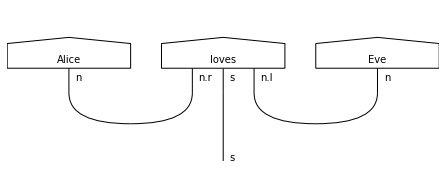

In [8]:
grammar.draw(test_diagrams[1])

# Diagrams into circuits

In [9]:
from discopy.quantum import Ket, H, Rx, CX, sqrt

def verb_ansatz(phase):
    return Ket(0, 0) >> H @ sqrt(2) @ Rx(phase) >> CX

print(verb_ansatz(0).eval())

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0.99999994+0.j, 0.    +0.j, 0.    +0.j, 0.99999994+0.j])


In [12]:
#from discopy import Diagram, Id, Cup
#from discopy.grammar import draw

In [11]:
#Alice, Bob, Eve = Word('Alice', n), Word('Bob', n), Word('Eve', n)
#loves, hates, kills =  Word('loves', n.r @ s @ n.l),  Word('hates', n.r @ s @ n.l) , Word('kills', n.r @ s @ n.l)

In [28]:
#grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

#parsing = {"{} {} {}".format(subj, verb, obj): subj @ verb @ obj >> grammar
 #           for subj in [Alice, Bob, Eve] for verb in [loves, hates, kills] for obj in [Alice, Bob, Eve]}

In [13]:
#parsing[train_sentences[0]]

In [14]:
#diagram = parsing[train_sentences[1]]
#print("Diagram for 'Alice loves Bob':")
#draw(diagram, draw_type_labels=True)

Circuit for 'train_sentences[0]': Bob kills Alice


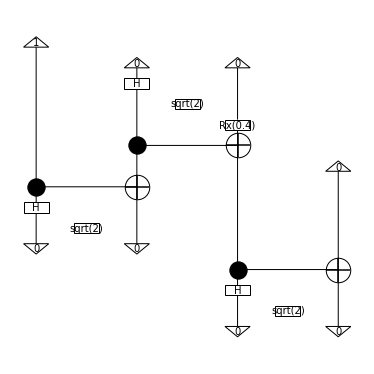

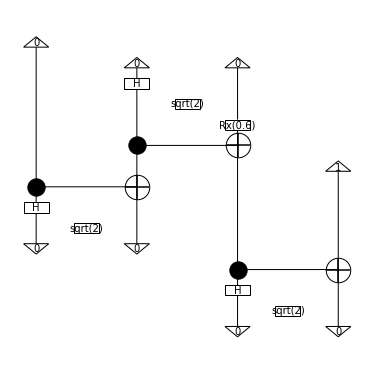

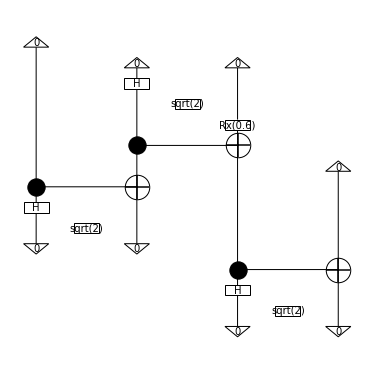

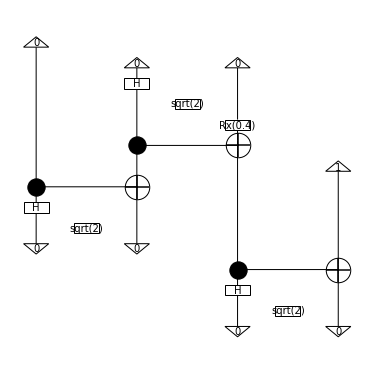

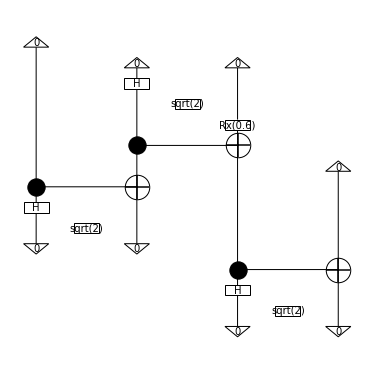

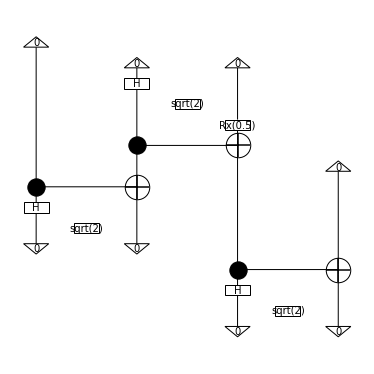

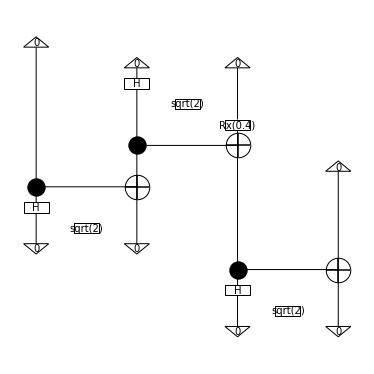

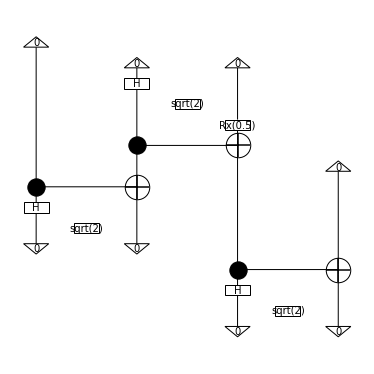

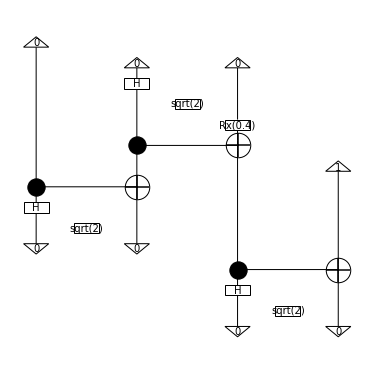

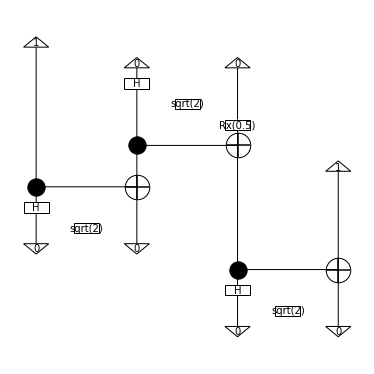

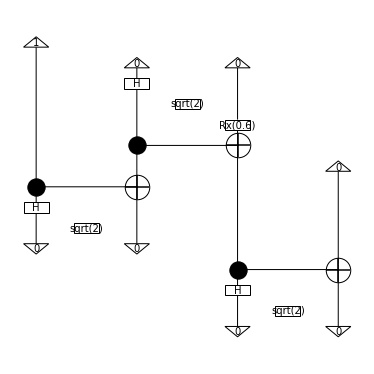

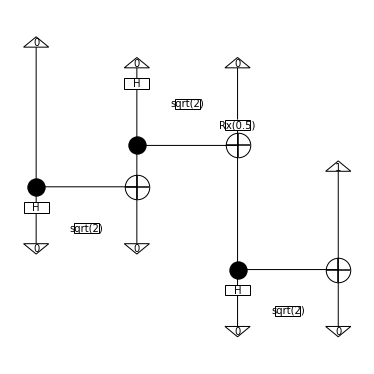

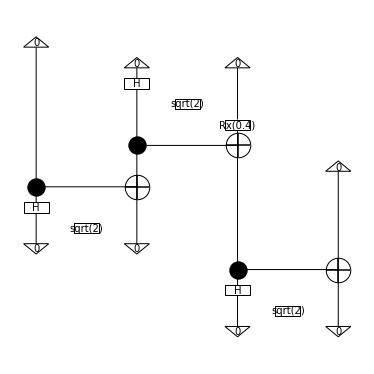

In [24]:
from discopy import CircuitFunctor, qubit

ob = {s: Ty(), n: 1}
ar = lambda params: {
    Alice: Ket(0), Bob: Ket(1), Eve: Ket(0),
    kills: verb_ansatz(params['kills']),
    loves: verb_ansatz(params['loves']),
    hates: verb_ansatz(params['hates'])}

F = lambda params: CircuitFunctor(ob, ar(params))

#params0 = {'loves': 0.5}
#params1 = {'hates': 0.6}
params2 = {'kills': 0.4}
params={'kills':0.4,'loves':0.5, 'hates':0.6}

print("Circuit for 'train_sentences[0]':", train_sentences[0])

for i in train_sentences:
    F(params)(parsing[i]).draw(
        aspect='auto', draw_type_labels=False, figsize=(5, 5))
#F(params1)(parsing[train_sentences[1]]).draw(
 #   aspect='auto', draw_type_labels=False, figsize=(5, 5))
#F(params2)(parsing[train_sentences[2]]).draw(
  #  aspect='auto', draw_type_labels=False, figsize=(5, 5))